<a href="https://colab.research.google.com/github/B-hub-hue/Python.exam_polymer/blob/main/Python_exam_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

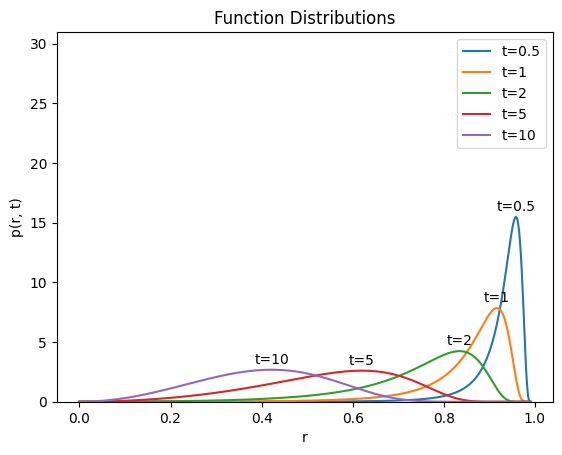

In [7]:
import math
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
def P(r= np.array([0.0, 0.2, 0.4, 0.6, 0.8, 0.99]), t=(0.5, 1, 2, 5, 10)):
# np.random.randint(0.1, 10, size=10)
  t = np.array(t)
  result=[]

  for time_val in t:
   a = 0.75*time_val
   C = 1/((np.pi**3/2)*(np.exp(-a))*(a**(-3/2))*((1+3*a**-1)+((15/4)*(a**-2))))
   prob = 4*C*np.pi*(r**2/(1-r**2)**(9/2))*np.exp((-3*time_val/4)*(1/(1-r**2)))
   result.append(prob)
   prob /= np.trapz(prob, r)  # Normalize using trapezoidal integration


  return np.array(result)

r= np.linspace(0, 0.99, 1000)#np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
t_values = (0.5, 1, 2, 5, 10)
result = P(r, t_values)

for i in range(result.shape[0]):
    plt.plot(r, result[i])
    # Annotate t value above each curve at the peak
    peak_x = r[np.argmax(result[i])]  # Find the x position of the peak
    peak_y = np.max(result[i])        # Find the y position of the peak
    plt.text(peak_x, peak_y + 0.5, f't={t_values[i]}', ha='center', fontsize=10)


#plt.plot(result)
plt.ylim(0, 2 *np.max(result))
plt.xlabel('r')
plt.ylabel('p(r, t)')
plt.title('Function Distributions')
plt.legend(['t=0.5', 't=1', 't=2', 't=5', 't=10'])
plt.show()

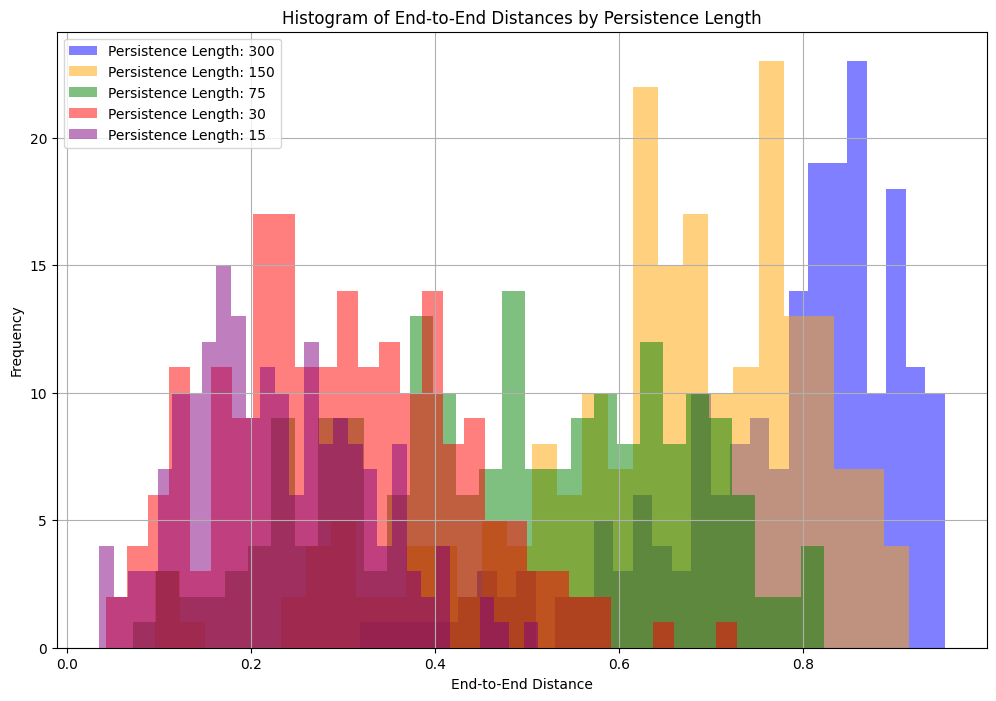

0.614035766840821


In [3]:
import numpy as np
import matplotlib.pyplot as plt

delta_theta = 0.102

def custom_gaussian_theta(delta_theta):
    #"""Sample from the custom Gaussian distribution for theta."""
    return np.random.normal(0, delta_theta)
def p(theta):

      return theta*np.exp(-theta**2/(2*delta_theta**2))

def rodrigues_rotation(v, k, theta, phi):
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def end_to_end_distance(positions):
    return np.linalg.norm(positions[-1] - positions[0])

    # Calculate the end-to-end distance
    end_position = np.array([delta_x, delta_y, delta_z])
    return np.linalg.norm(end_position)


# Parameters
num_segments = 1000
num_trials = 1000  # Number of trials to gather distances

persistence_lengths = np.array([300, 150, 75, 30, 15])  # Array of persistence lengths
axis_of_rotation = np.array([1, 1, 1])  # Rotate around z-axis

# Store distances for each persistence length
distances_dict = {length: [] for length in persistence_lengths}

for _ in range(num_trials):
    vectors = [np.array([1, 0, 0])]  # Starting vector
    persistence_length = np.random.choice(persistence_lengths)  # Randomly select a persistence length
    for _ in range(1, num_segments):
        # Sample theta based on the selected persistence length
        theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))  # Scale by persistence length
        axis_of_rotation = np.cross(np.random.random(size=3), vectors[-1])
        phi = np.random.uniform(0, 2 * np.pi)  # Uniformly distributed phi
        new_vector = rodrigues_rotation(vectors[-1], axis_of_rotation, theta, phi)
        vectors.append(new_vector)

    # Convert list of vectors to numpy array
    vectors = np.array(vectors)

    # Calculate end-to-end distance and store it
    distance = end_to_end_distance(vectors.cumsum(axis=0))/1000  # cumulative sum = cumsum
    distances_dict[persistence_length].append(distance)

# Plotting the histogram of end-to-end distances for each persistence length
plt.figure(figsize=(12, 8))

#colors = plt.cm.viridis(np.linspace(0, 1, len(persistence_lengths)))  # Color map
colors = ['blue', 'orange','green', 'red', 'purple']
for i, persistence_length in enumerate(persistence_lengths):
    plt.hist(distances_dict[persistence_length], bins=30,
             alpha=0.5, color=colors[i], #edgecolor='black',
             label=f'Persistence Length: {persistence_length}')


plt.title('Histogram of End-to-End Distances by Persistence Length')
plt.xlabel('End-to-End Distance')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
print(distance)

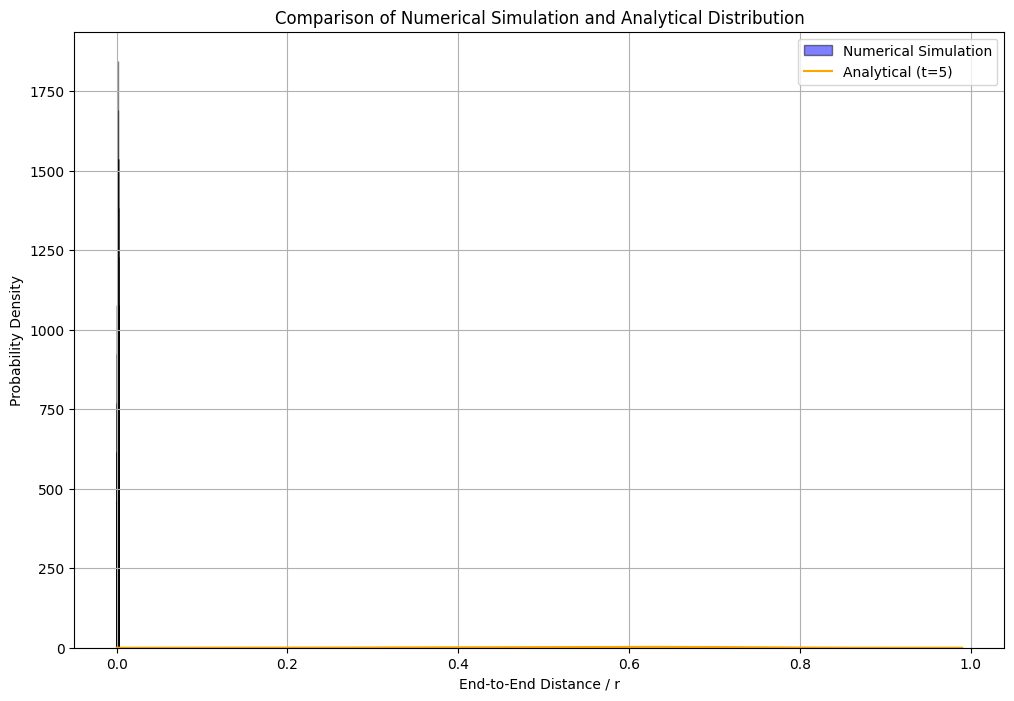

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def custom_gaussian_theta(delta_theta):
    #"""Sample from the custom Gaussian distribution for theta."""
    return np.random.normal(0, delta_theta)
def p(theta):

      return theta*np.exp(-theta**2/(2*delta_theta**2))

def rodrigues_rotation(v, k, theta, phi):
    k = k / np.linalg.norm(k)  # Ensure k is a unit vector
    c_theta = np.cos(theta)
    s_theta = np.sin(theta)
    return (v * c_theta +
            np.cross(k, v) * s_theta +
            k * np.dot(k, v) * (1 - c_theta))

def end_to_end_distance(positions):
    return np.linalg.norm(positions[-1] - positions[0])

    # Calculate the end-to-end distance
    end_position = np.array([delta_x, delta_y, delta_z])
    return np.linalg.norm(end_position)


# Parameters for Numerical Simulation
num_segments = 1000  # Number of segments in the polymer chain
num_trials = 1000   # Number of trials to gather distances
persistence_length = 30  # Persistence length

# Store distances for the numerical simulation
distances = []

for _ in range(num_trials):
    # Starting vector (arbitrary direction)
    vectors = [np.array([0, 0, 1])]

    for _ in range(1, num_segments):
        # Sample theta (polar angle) from Gaussian distribution
        theta = custom_gaussian_theta(1 / np.sqrt(persistence_length))

        # Random axis of rotation (normal vector)
        axis_of_rotation = np.random.random(3) - 0.5  # Random axis between -0.5 and 0.5
        axis_of_rotation = axis_of_rotation / np.linalg.norm(axis_of_rotation)

        # Sample phi (dihedral angle) uniformly between 0 and 2*pi
        phi = np.random.uniform(0, 2 * np.pi)

        # Rotate the previous vector by theta and phi
        new_vector = rodrigues_rotation(vectors[-1], axis_of_rotation, theta, phi)
        vectors.append(new_vector)

    # Convert list of vectors to numpy array
    vectors = np.array(vectors)

    # Calculate the end-to-end distance for this trial
    distance = end_to_end_distance(vectors)
    distances.append(distance)

# Prepare data for Analytical Distribution
def P(r, t):
    """Analytical solution for the probability distribution of end-to-end distance for worm-like chains."""
    a = 0.75 * t
    C = 1 / ((np.pi**3 / 2) * (np.exp(-a)) * (a**(-3/2)) * ((1 + 3 * a**-1) + (15 / 4) * (a**-2)))
    prob = 4 * C * np.pi * (r**2 / (1 - r**2)**(9/2)) * np.exp((-3 * t / 4) * (1 / (1 - r**2)))
    prob /= np.trapz(prob, r)  # Normalize using trapezoidal integration
    return prob

# Range of r values for analytical function
r = np.linspace(0, 0.99, 1000)
t_value = 5  # Let's take t = 10 for the analytical distribution
analytical_result = P(r, t_value)

# Plotting both distributions
plt.figure(figsize=(12, 8))

# Plot numerical simulation results
plt.hist(distances, bins=300, density=True, alpha=0.5, color='blue', edgecolor='black', label='Numerical Simulation')

# Plot analytical result
plt.plot(r, analytical_result, color='orange', label=f'Analytical (t={t_value})')

plt.xlabel('End-to-End Distance / r')
plt.ylabel('Probability Density')
plt.title('Comparison of Numerical Simulation and Analytical Distribution')
plt.legend()
plt.grid(True)
plt.show()